[9.797958971132712, 0.9106983740445366, 0.16492993543701592, 0.034996247510655734, 0.007346936120999701, 0.0015286840276219325, 0.00031703414883224763, 6.567954430669009e-05, 1.3602291762954902e-05, 2.816791596988142e-06]


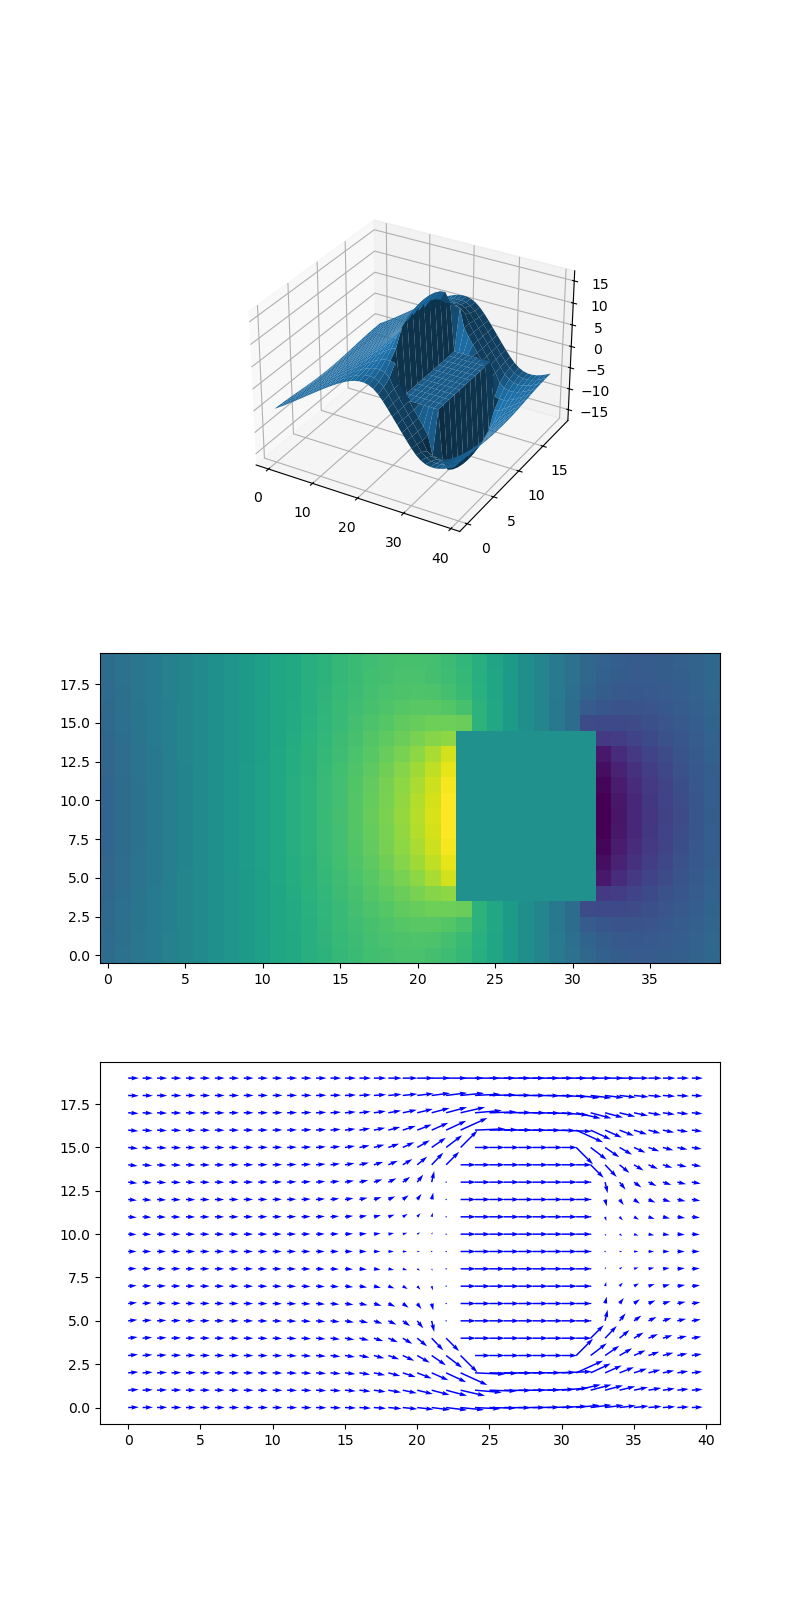

In [ ]:
# If constraints for the poisson boundary AND the interior overlap, solution doesn't
# converge.
%matplotlib widget
import matplotlib.pyplot as plt
import importlib
import navier_stokes
importlib.reload(navier_stokes)
import numpy as np

# grid = navier_stokes.read_matrix('grids/bullet20x30.txt')
grid = navier_stokes.read_matrix('grids/rectangle20x40.txt')
# grid = np.zeros((20,20))
height, width = grid.shape
cells = navier_stokes.cells(grid)
vf = np.zeros(cells.shape + (2,))

# vf[5:15, 5:15] = [2, 0]
vf[:,:] = [2, 0]

hd = navier_stokes.HelmholtzDecomposition(cells)

residuals = []
w, P = hd.solenoidalPart(vf, residuals)


# TODO: Implement real velocity calc. in HD1. For non-corner boundaries the 2-1 stencil should always work, no?


for fc in hd.fluid_cells:
    laplacian = -4*P[fc.index] + P[fc.left.index]+ P[fc.right.index]+ P[fc.up.index]+ P[fc.down.index]

    if np.abs(laplacian) > 0.003:
        print(f'{fc.index}, {laplacian}')


print(residuals)
# divfield = np.zeros(cells.shape)
# totalDivergence = 0
# for fc in cells.flat:
#     if isinstance(fc, navier_stokes.ObstacleInteriorCell):
#         P[fc.index] = None
#         continue
#     if not isinstance(fc, navier_stokes.FluidCell):
#         continue
#     xdiff = (vf[fc.right.index][0] - vf[fc.left.index][0]) / 2
#     ydiff = (vf[fc.up.index][1] - vf[fc.down.index][1]) / 2
#     divergence = xdiff + ydiff
#     divfield[fc.index] = np.abs(divergence)
#     totalDivergence += np.abs(divergence)
# print(totalDivergence)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.plot_surface(X, Y, P)
ax2.imshow(P, interpolation='none', origin='lower')
# ax3.imshow(divfield, interpolation='none', origin='lower')
ax3.quiver(X, Y, w[:, :, 0], w[:, :, 1], color="b")

plt.show()

In [42]:

print(cells[4,22].normal)
print(1/np.sqrt(2))


print(((16 - 12.4)/2)*(1/np.sqrt(2)))
print((12.6-12.5)*(1/np.sqrt(2)))

print(2/np.sqrt(2))
# Nebi smelo! Posto je jednacina resena u malo iteracija, taj kvadrat treba da je 0.

[0.70710678 0.70710678]
0.7071067811865475
1.2727922061357853
0.07071067811865449
1.414213562373095


In [13]:
(-0.50 + 0.36)

-0.14